# Cleaning, Transforming, and Enriching Data


Dans les deux chapitres précédents, vous avez appris à créer des pipelines de données capables de lire et d'écrire à partir de fichiers et de bases de données. Dans de nombreux cas, ces compétences à elles seules vous permettront de créer des pipelines de données de production. Par exemple, vous lirez des fichiers d'un lac de données et les insérerez dans une base de données. Vous avez maintenant les compétences pour y parvenir. Parfois, cependant, vous devrez faire quelque chose avec les données après l'extraction mais avant le chargement. Ce que vous devrez faire est de nettoyer les données. Le nettoyage est un terme vague. Plus spéciquement, vous devrez vérifier la validité des données et répondre à des questions telles que les suivantes : Est-elle complète ? Les valeurs sont-elles comprises dans les plages appropriées ? Les colonnes sont-elles du bon type ? Toutes les colonnes sont-elles utiles ?


Dans ce chapitre, vous apprendrez les compétences de base nécessaires pour effectuer une analyse exploratoire des données. Une fois que vous aurez compris les données, vous utiliserez ces connaissances pour résoudre les problèmes de données courants que vous avez découverts, tels que la suppression de colonnes et le remplacement de valeurs NULL. Vous apprendrez de nombreuses méthodes utiles disponibles dans la bibliothèque pandas pour Python. Ces compétences vous permettront d'effectuer rapidement une analyse exploratoire des données et de nettoyer les données, le tout dans Python. Ces compétences deviendront les outils de l'étape de transformation du processus d'ingénierie des données ETL.



Dans ce chapitre, nous allons couvrir les principaux sujets suivants : 

* Effectuer une analyse exploratoire des données en Python 
* Gérer les problèmes de données courants à l'aide de pandas 
* Nettoyer les données à l'aide d'Airflow




## Effectuer une analyse exploratoire des données dans Python

Avant de pouvoir nettoyer vos données, vous devez savoir à quoi ressemblent vos données. En tant qu'ingénieur de données, vous n'êtes pas l'expert du domaine et n'êtes pas l'utilisateur final des données, mais vous devez savoir à quoi serviront les données et à quoi ressembleraient des données valides. Par exemple, nul besoin d'être démographe pour savoir qu'un champ d'âge ne doit pas être négatif et que la fréquence des valeurs supérieures à 100 doit être faible

## Téléchargement des données

Dans ce chapitre, vous utiliserez de vraies données de scooters électriques de la ville d'Albuquerque. Les données contiennent les trajets effectués en scooter électrique de mai au 22 juillet 2019. Vous devrez télécharger les données du scooter électrique à partir de https://github.com/PaulCrickard/escooter/blob/master/scooter.csv. Le référentiel contient également le fichier Excel original ainsi que d'autres chiers récapitulatifs fournis par la ville d'Albuquerque

## Exploration des données de base

Avant de pouvoir nettoyer vos données, vous devez savoir à quoi ressemblent vos données. Le processus de compréhension de vos données est appelé analyse exploratoire des données (EDA). Vous examinerez la forme de vos données, le nombre de lignes et de colonnes, ainsi que les types de données dans les colonnes et les plages de valeurs. Vous pouvez effectuer une analyse beaucoup plus approfondie, telle que la distribution des données ou l'asymétrie, mais pour cette section, vous apprendrez à comprendre rapidement vos données afin que dans la section suivante, vous puissiez les nettoyer. Dans les deux chapitres précédents, vous avez appris à importer des fichiers et des bases de données dans des DataFrames pandas. Ces connaissances seront développées dans cette section, car DataFrames sera l'outil utilisé pour l'EDA. Pour commencer, vous devrez importer des pandas et lire le fichier .csv :


    import pandas as pd
    df=pd.read_csv('scooter.csv')

Avec les données dans un DataFrame, vous pouvez maintenant l'explorer, puis l'analyser.



## Exploration des données

Vous pouvez maintenant commencer à examiner les données. La première chose que vous voudrez probablement faire est de l'imprimer. Mais avant d'en arriver là, jetez un œil aux colonnes et aux types de données utilisant les colonnes et les types :

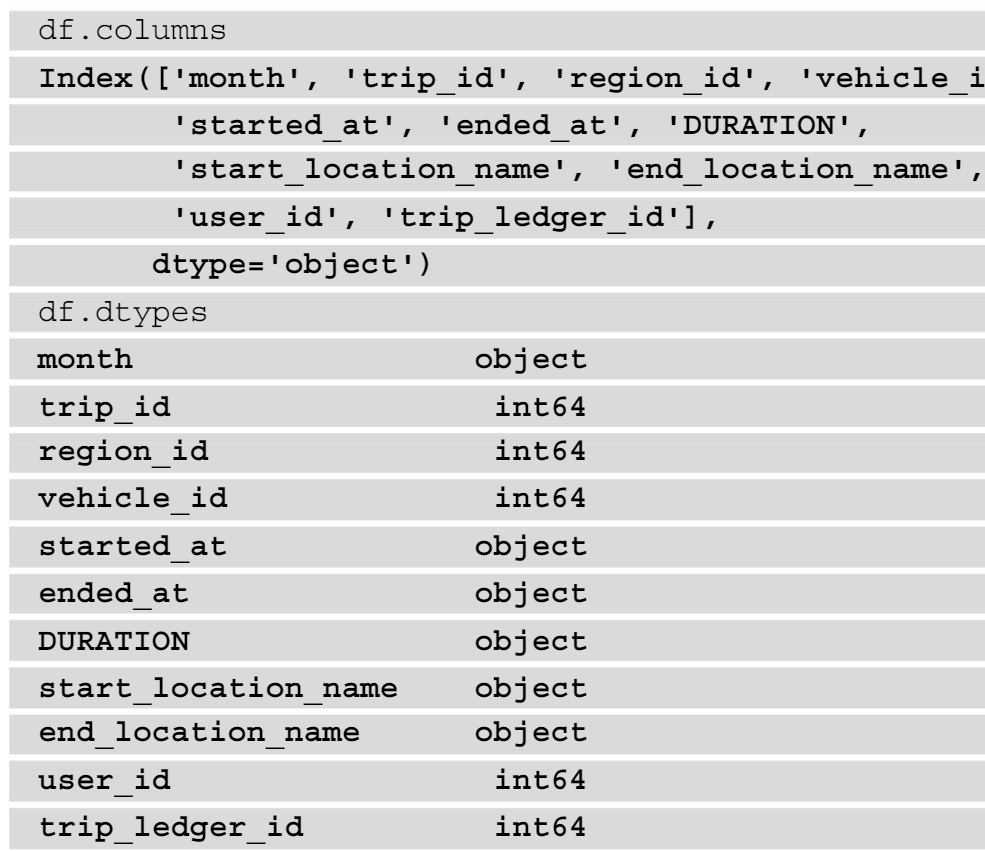

Vous verrez que vous avez onze colonnes, dont cinq sont des entiers (toutes les colonnes avec ID dans leur nom) et les autres sont des objets. Les objets sont ce qu'un DataFrame utilise comme dtype lorsqu'il existe des types mixtes. De plus, DURATION doit se démarquer car c'est le seul nom de colonne en majuscules. Dans la section suivante, vous corrigerez les erreurs courantes, telles que les casses des colonnes ne sont pas uniformes (toutes en minuscules ou en majuscules) et ferez les types d'objets appropriés, tels que les chaînes pour les données texte et les datetimes pour les dates et les heures. Vous savez maintenant ce que vous avez pour les colonnes et les types, regardons les données. Vous pouvez imprimer les cinq premiers enregistrements en utilisant head() :


    df.head()

L'opposé de head() est tail(). Ces deux méthodes affichent par défaut 5 lignes. Cependant, vous pouvez passer un entier comme paramètre qui spécifie le nombre de lignes à afficher. Par exemple, vous pouvez passer head(10) pour voir les 10 premières lignes. Notez à la fois dans la sortie head() et tail() que la troisième colonne est ..., puis il y a deux colonnes supplémentaires après cela . L'affichage rogne les colonnes du milieu. Si vous deviez imprimer l'intégralité du DataFrame, la même chose se produirait également avec les lignes. Pour afficher toutes les colonnes, vous pouvez modifier le nombre de colonnes à afficher à l'aide de la méthode set_options :


    pd.set_option('display.max_columns', 500)


Maintenant, lorsque vous utilisez head(), vous verrez toute la colonne. Cependant, selon la largeur de votre affichage, la sortie peut être encapsulée dans FI. Les méthodes head et tail affichent toutes les colonnes, mais si vous n'êtes intéressé que par une seule colonne, vous pouvez la spécifier comme vous le feriez dans un Dictionnaire Python. Le code suivant imprime la colonne DURATION :


      df['DURATION']



Encore une fois, notez que la sortie est rognée avec ..., mais cette fois pour les lignes. Le résultat est la combinaison de head() et tail(). Vous pouvez changer cela en utilisant l'option display_max_rows comme vous l'avez fait précédemment avec les colonnes, mais pour cette exploration, ce n'est pas nécessaire. Tout comme vous pouvez afficher une seule colonne, vous pouvez afficher une liste de colonnes en utilisant le double [], comme indiqué dans le bloc de code suivant :


    df[['trip_id','DURATION','start_location_name']] 


Vous pouvez également extraire un échantillon de vos données à l'aide de sample(). Les exemples de méthodes vous permettent de spécifier le nombre de lignes que vous souhaitez extraire. Les résultats sont affichés dans le bloc de code suivant :


    df.sample(5)



Notez que l'index des lignes n'est pas incrémentiel, mais qu'il saute plutôt. Il devrait, car il s'agit d'un échantillon. Vous pouvez également découper les données. Le découpage prend le format de [début:fin], où un blanc est la première ou la dernière ligne selon la position vide. Pour découper les 10 premières lignes, vous pouvez utiliser la notation suivante :


    df[:10]

De même, pour saisir les lignes de 10 à la fin (34 225), vous pouvez utiliser la notation suivante :


    df[10:]


Vous pouvez également découper le cadre en commençant par la troisième ligne et en se terminant avant neuf heures, comme indiqué dans le bloc de code suivant :


    df[3:9]


Parfois, vous connaissez la ligne exacte que vous voulez, et au lieu de la découper, vous pouvez la sélectionner en utilisant loc(). La méthode loc prend le nom de l'index, qui, dans cet exemple, est un entier. Le code et la sortie suivants montrent une seule ligne sélectionnée avec loc() :


    df.loc[34221]


En utilisant at(), avec la position, comme vous l'avez fait dans les exemples de découpage, et un nom de colonne, vous pouvez sélectionner une seule valeur. Par exemple, cela peut être fait pour connaître la durée du trajet dans la deuxième ligne :

    df.at[2,'DURATION']

Le découpage et l'utilisation de loc() et at() extraient les données en fonction de la position, mais vous pouvez également utiliser DataFrames pour sélectionner des lignes en fonction de certaines conditions. À l'aide de la méthode where, vous pouvez passer une condition, comme indiqué dans le bloc de code suivant :



    user=df.where(df['user_id']==8417864)


Le code et les résultats précédents montrent les résultats de where avec la condition de l'ID utilisateur étant égal à 8417864. Les résultats remplacent les valeurs qui ne répondent pas aux critères en tant que NaN. Ceci sera couvert dans la section suivante. 

Vous pouvez obtenir les mêmes résultats similaires à l'exemple précédent à l'exception de l'utilisation d'une notation différente, et cette méthode n'inclura pas les lignes NaN. Vous pouvez transmettre la condition dans le DataFrame comme vous l'avez fait avec les noms de colonnes. L'exemple suivant vous montre comment :



    df[(df['user_id']==8417864)]

Les résultats du code précédent sont les mêmes que l'exemple where(), mais sans les lignes NaN, donc le DataFrame n'aura que quatre lignes. En utilisant les deux notations, vous pouvez combiner des instructions conditionnelles. 

En utilisant la même condition d'ID utilisateur, vous pouvez ajouter une condition d'ID de trajet. L'exemple suivant vous montre comment :



    one=df['user_id']==8417864
    two=df['trip_ledger_id']==1488838
    
    df.where(one & two)

En utilisant la deuxième notation, la sortie est la suivante


    df[(one)&(two)]


Dans les exemples précédents, les conditions ont été affectées à une variable et combinées à la fois dans la notation where et secondaire, générant les résultats attendus

## Analyser les données

Maintenant que vous avez vu les données, vous pouvez commencer à les analyser. En utilisant la méthode describe, vous pouvez voir une série de statistiques relatives à vos données. Dans les statistiques, il existe un ensemble de statistiques appelé résumé à cinq chiffres, et describe() en est une variante :


      df.describe()
  
La méthode describe n'est pas très utile à moins d'avoir des données numériques. Si vous regardiez les âges par exemple, cela vous montrerait rapidement la distribution des âges, et vous seriez en mesure de voir rapidement des erreurs telles que des âges négatifs ou trop d'âges supérieurs à 100


L'utilisation de describe() sur une seule colonne est parfois plus utile. Essayons de regarder la colonne start_location_name. Le code et les résultats sont affichés dans le bloc de code suivant :


    df['start_location_name'].describe()


Les données ne sont pas numériques, nous obtenons donc un ensemble différent de statistiques, mais celles-ci fournissent un aperçu. Sur les 34220 emplacements de départ, il y a en fait 2972 ​​emplacements uniques. 

L'emplacement le plus élevé (1898 Mountain Rd NW) représente 1210 emplacements de départ de voyage. Plus tard, vous géocoderez ces données - ajoutez des coordonnées à l'adresse - et connaître les valeurs uniques signifie que vous n'aurez qu'à géocoder ces 2 972 et non les 34 220 complets. Une autre méthode qui vous permet de voir les détails de vos données est value_counts. La méthode value_counts vous donnera la valeur et le nombre de toutes les valeurs uniques. Nous devons l'appeler à une seule colonne, ce qui est fait dans l'extrait suivant :



    df['DURATION'].value_counts()


À partir de cette méthode, vous pouvez voir que 0:04:00 est au sommet avec une fréquence de 825 - que vous auriez pu découvrir avec describe() - mais vous pouvez également voir la fréquence de toutes les autres valeurs. Pour voir la fréquence en pourcentage, vous pouvez passer le paramètre normalize (qui est False par défaut) :


    df['DURATION'].value_counts(normalize=True)


Vous remarquerez qu'aucune valeur ne représente un pourcentage significatif de la durée. Vous pouvez également passer le paramètre dropna. Par défaut, value_counts() le définit sur True et vous ne les verrez pas. En le définissant sur False, vous pouvez voir qu'il manque 2070 entrées à end_location_name :


    df['end_location_name'].value_counts(dropna=False)


Le meilleur moyen de connaître le nombre de valeurs manquantes que vous avez dans vos colonnes est d'utiliser la méthode isnull(). Le code suivant combine isnull() avec sum() pour obtenir les comptes :


    df.isnull().sum()

Un autre paramètre de value_counts() est bins. L'ensemble de données du scooter n'a pas de bonne colonne pour cela, mais en utilisant une colonne numérique, vous obtiendrez des résultats comme les suivants :


    df['trip_id'].value_counts(bins=10)


Ces résultats n'ont pas de sens, mais s'ils sont utilisés sur une colonne telle que l'âge, cela serait utile car vous pourriez créer rapidement des groupes d'âge et avoir une idée de la distribution. 

Maintenant que vous avez exploré et analysé les données, vous devez comprendre ce que sont les données et quels sont les problèmes - par exemple, les valeurs NULL, les types incorrects, les combinaisons et les champs. Avec cette connaissance, vous pouvez commencer à nettoyer les données. La section suivante vous expliquera comment résoudre les problèmes de données courants.

## Gérer les problèmes de données courants à l'aide de pandas 

Vos données peuvent sembler spéciales, elles sont uniques, vous avez créé les meilleurs systèmes au monde pour les collecter et vous avez fait tout votre possible pour vous assurer qu'elles sont propres et précises. Toutes nos félicitations! Mais vos données auront presque certainement des problèmes, et ces problèmes ne sont pas spéciaux ou uniques, et sont probablement le résultat de vos systèmes ou de la saisie de données. L'ensemble de données des scooters électriques est collecté à l'aide du GPS avec peu ou pas d'intervention humaine, mais il manque des emplacements d'extrémité. Comment est-il possible qu'un scooter ait été loué, utilisé et arrêté, alors que les données ne savent pas où il s'est arrêté ? Cela semble étrange, pourtant nous y sommes. Dans cette section, vous apprendrez à résoudre les problèmes de données courants à l'aide de l'ensemble de données e-scooter.

## Supprimer des lignes et des colonnes

Avant de modifier des champs dans vos données, vous devez d'abord décider si vous allez utiliser tous les champs. En regardant les données du scooter électrique, il existe un champ nommé region_id. Ce champ est un code utilisé par le vendeur pour étiqueter Albuquerque. Comme nous n'utilisons que les données d'Albuquerque, nous n'avons pas besoin de ce champ car il n'ajoute rien aux données. Vous pouvez supprimer des colonnes à l'aide de la méthode drop. La méthode vous permettra de spécifier s'il faut supprimer une ligne ou une colonne. Les lignes sont la valeur par défaut, nous allons donc spécifier des colonnes, comme indiqué dans le bloc de code suivant :


    df.drop(columns=['region_id'], inplace=True)

En spécifiant les colonnes à supprimer, vous devez également ajouter en place pour le faire modifier le DataFrame d'origine. Pour supprimer une ligne, il vous suffit de spécifier un index au lieu de colonnes. Pour supprimer la ligne avec l'index de 34225, vous devez utiliser le code suivant :


    df.drop(index=[34225],inplace=True)


Le code précédent fonctionne lorsque vous souhaitez supprimer une colonne ou une ligne entière, mais que se passe-t-il si vous vouliez les supprimer en fonction de conditions ? La première condition que vous voudrez peut-être considérer est l'endroit où il y a des valeurs NULL. 

S'il vous manque des données, la colonne et la ligne peuvent ne pas être utiles ou peuvent fausser les données. Pour gérer cela, vous pouvez utiliser dropna(). En utilisant dropna(), vous pouvez passer axe, comment, thresh, sous-ensemble et inplace en tant que paramètres :

* axis: spécifie des lignes ou des colonnes avec des index ou des colonnes (0 ou 1) . La valeur par défaut est rows.
*  how spécifie s'il faut supprimer des lignes ou des colonnes si toutes les valeurs sont nulles ou si une valeur est nulle (toute ou n'importe laquelle). La valeur par défaut est any.
*  thresh permet plus de contrôle que vous permettant de spécifier une valeur entière du nombre de nulls devant être présents.
* subset  vous permet de spécifier une liste de lignes ou de colonnes à rechercher.
*  inplace  vous permet de modifier le DataFrame existant . La valeur par défaut est False.
  

En regardant les données de l'e-scooter, il y a six lignes sans nom d'emplacement de départ :


    df['start_location_name'][(df['start_location_name'].isnull())]
  

Pour supprimer ces lignes, vous pouvez utiliser dropna sur l'axe=0 avec how=any, qui sont les valeurs par défaut. Cela supprimera cependant les lignes où d'autres valeurs NULL existent, telles que end_location_name. Vous devrez donc spécifier le nom de la colonne en tant que sous-ensemble, comme indiqué dans le bloc de code suivant :


    df.dropna(subset=['start_location_name'],inplace=True)

en, lorsque vous sélectionnez des nulls dans le champ start_location_name comme dans le bloc de code précédent, vous obtiendrez une série vide :


      df['start_location_name'][(df['start_location_name'].isnull())]

La suppression d'une colonne entière en fonction des valeurs manquantes n'a de sens que si un certain pourcentage de lignes est nulle. Par exemple, si plus de 25 % des lignes sont nulles, vous souhaiterez peut-être les supprimer. Vous pouvez le spécifier dans le seuil en utilisant quelque chose comme le code suivant pour le paramètre de seuil :


    thresh=int(len(df)*.25)


Avant d'afficher des filtres plus avancés pour la suppression de lignes, vous ne souhaiterez peut-être pas supprimer les valeurs NULL. Vous voudrez peut-être les remplir avec une valeur. Vous pouvez utiliser fillna() pour remplir des colonnes ou des lignes nulles :


    df.fillna(value='00:00:00',axis='columns')



Que se passe-t-il si vous souhaitez utiliser fillna() mais utiliser des valeurs différentes en fonction de la colonne ? Vous ne voudriez pas avoir à spécifier une colonne à chaque fois et à exécuter fillna() plusieurs fois. Vous pouvez spécifier un objet à mapper au DataFrame et le transmettre en tant que paramètre de valeur. 

Dans le code suivant, nous allons copier les lignes où les emplacements de début et de fin sont nuls. Ensuite, nous allons créer un objet value qui attribue un nom de rue au champ start_location_name et une adresse diérente au champ end_location_name. En utilisant fillna(), nous passons la valeur au paramètre value, puis imprimons ces deux colonnes dans le DataFrame en affichant le changement



      startstop=df[(df['start_location_name'].isnull())&(df['end_location_name'].isnull())]
      value={'start_location_name':'Start St.','end_location_name':'Stop St.'}
      startstop.fillna(value=value)
      startstop[['start_location_name','end_location_name']]


Vous pouvez supprimer des lignes basées sur des filtres plus avancés ; par exemple, que se passe-t-il si vous souhaitez supprimer toutes les lignes où le mois était mai ? Vous pouvez parcourir le DataFrame et vérifier le mois, puis le supprimer s'il s'agit de mai. Ou, une bien meilleure façon serait de filtrer les lignes, puis de passer l'index à la méthode drop. Vous pouvez filtrer le DataFrame et le transmettre à un nouveau, comme indiqué dans le bloc de code suivant


    may=df[(df['month']=='May')]

Ensuite, vous pouvez utiliser drop() sur le DataFrame d'origine et transmettre l'index des lignes dans le DataFrame, comme indiqué :


    df.drop(index=may.index,inplace=True)

Maintenant, si vous regardez les mois dans le DataFrame d'origine, vous verrez que mai est manquant :


    df['month'].value_counts()

Maintenant que vous avez supprimé les lignes et les colonnes dont vous n'avez pas besoin ou qui étaient inutilisables en raison de données manquantes, il est temps de les formater


## Créer et modifier des colonnes

 La première chose qui ressort dans la section précédente est qu'il n'y a qu'une seule colonne, la durée, qui est entièrement en majuscules. La capitalisation est un problème courant. Vous trouverez souvent des colonnes avec toutes les majuscules, ou avec une casse de titre — où la première lettre de chaque mot est en majuscule — et si un codeur l'a écrite, vous pouvez trouver une casse camel — où la première lettre est en minuscule et la première lettre du mot suivant est majuscule sans espace, comme dans camelCase. Le code suivant rendra toutes les colonnes en minuscules :



    df.columns=[x.lower() for x in df.columns] 
    print(df.columns)


Le code précédent est une version condensée d'une boucle for. Ce qui se passe dans la boucle vient avant la boucle for. Le code précédent indique que pour chaque élément de df.columns, mettez-le en minuscule et attribuez-le à nouveau à df.columns. Vous pouvez également utiliser majuscule(), qui correspond à la casse du titre, ou upper() comme indiqué :


    df.columns=[x.upper() for x in df.columns] print(df.columns)


Vous pouvez également définir le champ DURATION en minuscules en utilisant la méthode de renommage, comme indiqué :

df.rename(columns={'DURATION':'duration'},inplace=True)


Vous remarquerez un paramètre inplace défini sur True. Lorsque vous avez utilisé psycopg2 pour modifier des bases de données, vous devez utiliser conn.commit() pour le rendre permanent, et vous devez faire de même avec DataFrames. Lorsque vous modifiez un DataFrame, le résultat est renvoyé. Vous pouvez stocker ce nouveau DataFrame (résultat) dans une variable, et le DataFrame d'origine reste inchangé. Si vous souhaitez modifier le DataFrame d'origine et ne pas l'affecter à une autre variable, vous devez utiliser le paramètre inplace. La méthode de renommage fonctionne pour xer la casse des noms de colonnes mais n'est pas le meilleur choix. Il est préférable de l'utiliser pour modifier réellement plusieurs noms de colonnes. Vous pouvez transmettre un objet avec un remappage de noms de colonnes multiples. Par exemple, vous pouvez supprimer le trait de soulignement dans region_id en utilisant rename. Dans l'extrait de code suivant, nous modifions la colonne DURATION en minuscules et supprimons le trait de soulignement dans region_id :


    df.rename(columns={'DURATION':'duration','region_id':'region'},inplace=True)



Il est bon de connaître différentes manières d'accomplir la même tâche, et vous pouvez décider celle qui convient le mieux à votre cas d'utilisation. Maintenant que vous avez appliqué les modifications aux noms de colonnes, vous pouvez également appliquer ces fonctions aux valeurs des colonnes. Au lieu d'utiliser df.columns, vous spécifierez la colonne à modifier, puis s'il faut la rendre supérieure (), inférieure () ou majuscule (). Dans l'extrait de code suivant, nous avons mis la colonne du mois en majuscules :

      df['month']=df['month'].str.upper()
      df['month'].head()


La mise en majuscule des noms de colonnes ou des valeurs peut ne pas avoir d'importance. Cependant, il vaut mieux être cohérent. Dans le cas des données sur les scooters, avoir un nom de colonne en majuscules, alors que les autres étaient toutes inférieures, deviendrait déroutant. Imaginez un scientifique des données interrogeant les données de plusieurs bases de données ou de votre entrepôt de données et devant se rappeler que toutes leurs requêtes devaient prendre en compte le champ de durée étant en majuscules, et quand ils oubliaient, leur code échouait.



Vous pouvez ajouter des données au DataFrame en créant des colonnes à l'aide du format df['new column name']=value.


Le format précédent créerait une nouvelle colonne et affecterait la valeur à chaque ligne. Vous pouvez parcourir un DataFrame et ajouter une valeur en fonction d'une condition, par exemple :




    for i,r in df.head().iterrows():    
      if r['trip_id']==1613335:        
        df.at[i,'new_column']='Yes'    
      else:        
        df.at[i,'new_column']='No'
       
L'itération à travers les DataFrames fonctionne mais peut être très lente. Pour accomplir la même chose que dans l'exemple précédent, mais de manière plus eficace, vous pouvez utiliser loc() et passer la condition, le nom de la colonne, puis la valeur. L'exemple suivant montre le code et les résultats :



    df.loc[df['trip_id']==1613335,'new_column']='1613335'

Une autre façon de créer des colonnes consiste à diviser les données, puis à les insérer dans le DataFrame. Vous pouvez utiliser str.split() sur une série pour diviser le texte sur n'importe quel séparateur, ou un pat (abréviation de motif) lorsque le paramètre est appelé. Vous pouvez spécifier le nombre de fractionnements que vous souhaitez produire - -1 et 0 signifient tous les fractionnements - mais tout nombre entier est autorisé. Par exemple, si vous avez 1 000 000 et que vous ne voulez que deux pièces, vous pouvez diviser (2) sur la virgule et obtenir 1 et 000 000. Vous pouvez également développer les divisions en colonnes à l'aide de (expand=True). Si vous ne définissez pas expand sur True, vous obtiendrez une liste dans la colonne, qui est la valeur par défaut. De plus, si vous ne spécifiez pas de séparateur, des espaces seront utilisés. Les valeurs par défaut sont affichées


    d['started_ad=df[['trip_id','started_at']].head()
    d['started_at'].str.split()
    d   
      trip_id          started_at
     0  1613335  [5/21/2019, 18:33]
     1  1613639  [5/21/2019, 19:07]
     2  1613708  [5/21/2019, 19:13]
     3  1613867  [5/21/2019, 19:29]
     4  1636714  [5/24/2019, 13:38]


Vous pouvez développer les données et les transmettre à une nouvelle variable. Ensuite, vous pouvez affecter les colonnes à une colonne dans le DataFrame d'origine. Par exemple, si vous souhaitez créer une colonne de date et d'heure, vous pouvez procéder comme suit :


    new=d['started_at'].str.split(expand=True)
    new
               0      1
    0  5/21/2019  18:33
    1  5/21/2019  19:07
    2  5/21/2019  19:13
    3  5/21/2019  19:29
    4  5/24/2019  13:38
    
    d['date']=new[0]
    d['time']=new[1]
    d   
       trip_id       started_at       date   time
    0  1613335  5/21/2019 18:33  5/21/2019  18:33
    1  1613639  5/21/2019 19:07  5/21/2019  19:07
    2  1613708  5/21/2019 19:13  5/21/2019  19:13
    3  1613867  5/21/2019 19:29  5/21/2019  19:29
    4  1636714  5/24/2019 13:38  5/24/2019  13:38


Si vous vous souvenez de la section Exploration des données, les données avaient plusieurs objets dtypes. La colonne start_at est un objet et, en la regardant, il devrait être clair qu'il s'agit d'un objet datetime. Si vous essayez de filtrer sur le champ start_at en utilisant une date, il renverra toutes les lignes, comme indiqué


    when = '2019-05-23'
    x=df[(df['started_at']>when)]
    len(x)
    34226

La longueur de l'ensemble du DataFrame est de 34226, donc le filtre a renvoyé toutes les lignes. Ce n'est pas ce que nous voulions. En utilisant to_datetime(), vous pouvez spécifier la colonne et le format. Vous pouvez affecter le résultat à la même colonne ou en spécifier une nouvelle. Dans l'exemple suivant, la colonne start_at est remplacée par le nouveau type de données datetime :


    d['started_at']=pd.to_datetime(df['started_at'],format='%m/%d/%Y %H:%M')
    d.dtypes
    trip_id                int64
    started_at    datetime64[ns]


Désormais, la colonne start_at est un type de données datetime et non un objet. Vous pouvez maintenant exécuter des requêtes à l'aide de dates, comme nous l'avons tenté précédemment sur le DataFrame complet et avons échoué :



    when = '2019-05-23'
    d[(d['started_at']>when)]   
        trip_id          started_at
    4  1636714 2019-05-24 13:38:00

Le reste des lignes était tous le 2019-05-21, nous avons donc obtenu les résultats que nous attendions. Maintenant que vous pouvez ajouter et supprimer des lignes et des colonnes, remplacer les valeurs NULL et créer des colonnes, dans la section suivante, vous apprendrez comment pour enrichir vos données avec des sources externes.

## Enrichir les données 

Les données des scooters électriques sont des données géographiques - elles contiennent des emplacements - mais elles manquent de coordonnées. Si vous souhaitez cartographier ou effectuer des requêtes spatiales sur ces données, vous aurez besoin de coordonnées. Vous pouvez obtenir des coordonnées en géocodant l'emplacement. Par chance, la ville d'Albuquerque dispose d'un géocodeur public que nous pouvons utiliser. Pour cet exemple, nous prendrons un sous-ensemble des données. Nous utiliserons les cinq emplacements de départ les plus fréquents. Nous allons ensuite les mettre dans un DataFrame en utilisant le code suivant :


    new=pd.DataFrame(df['start_location_name'].value_counts().head())
    new.reset_index(inplace=True)
    new.columns=['address','count']


  
Le champ d'adresse contient plus d'informations que nous n'en avons besoin pour géocoder. Nous n'avons besoin que de l'adresse de la rue. Vous remarquerez également que le deuxième enregistrement est une intersection – Central @ Tingley. Le géocodeur voudra le mot et entre les rues. Nettoyons les données et mettons-les dans sa propre colonne :



    n=new['address'].str.split(pat=',',n=1,expand=True)
    replaced=n[0].str.replace("@","and")
    new['street']=n[0]
    new['street']=replaced

Vous pouvez maintenant parcourir le DataFrame et géocoder le champ de la rue. Pour cette section, vous utiliserez un autre CSV et le joindrez au DataFrame. Vous pouvez enrichir les données en les combinant avec d'autres sources de données. 

Tout comme vous pouvez joindre les données de deux tables dans une base de données, vous pouvez faire de même avec un DataFrame pandas. Vous pouvez télécharger le fichier geocodedstreet.csv à partir du référentiel GitHub. Chargez les données à l'aide de pd.read_csv() et vous aurez un DataFrame avec une colonne de rue, ainsi qu'une colonne pour les coordonnées x et y. Le résultat est présenté comme suit


    geo=pd.read_csv('geocodedstreet.csv')

Pour enrichir le DataFrame d'origine avec ces nouvelles données, vous pouvez joindre ou fusionner les DataFrames. À l'aide d'une jointure, vous pouvez commencer par un DataFrame, puis ajouter l'autre en tant que paramètre. Vous pouvez transmettre comment joindre en utilisant la gauche, la droite ou l'intérieur, comme vous le feriez en SQL. Vous pouvez ajouter un suffixe gauche et droit afin que les colonnes qui se chevauchent aient un moyen de déterminer d'où elles viennent. Nous avons joint les deux DataFrames dans l'exemple suivant :


    joined=new.join(other=geo, how='left', lsuffix='_new', rsuffix='_geo'




La colonne de street est dupliquée et a un sufix gauche et droit. Cela fonctionne mais n'est pas nécessaire, et nous finirions par supprimer une colonne et renommer la colonne restante, ce qui n'est qu'un travail supplémentaire. Vous pouvez utiliser la fusion pour joindre les DataFrames sur une colonne et ne pas avoir les doublons. Merge vous permet de transmettre les DataFrames à fusionner ainsi que le champ à joindre, comme indiqué :


    merged=pd.merge(new,geo,on='street')

Remarquez comment les nouveaux champs x et y sont entrés dans le nouveau DataFrame, mais il n'y a qu'une seule colonne de rue. C'est beaucoup plus propre. Dans les deux cas, joint ou fusionné, vous ne pouvez utiliser l'index que s'il est défini sur les deux DataFrames. Maintenant que vous savez comment nettoyer, transformer et enrichir les données, il est temps de rassembler ces compétences et de créer un pipeline de données. en utilisant ces nouvelles connaissances. Les deux sections suivantes vous montreront comment utiliser Airflow pour créer un pipeline de données.





## Nettoyage des données à l'aide d'Airflow

Maintenant que vous pouvez nettoyer vos données en Python, vous pouvez créer des fonctions pour effectuer différentes tâches. En combinant les fonctions, vous pouvez créer un pipeline de données dans Airflow. L'exemple suivant nettoiera les données, puis les filtrera et les écrira sur le disque. En commençant par le même code Airflow que vous avez utilisé dans les exemples précédents, configurez les importations et les arguments par défaut, comme indiqué :


    import datetime as dt
    from datetime import timedelta

    from airflow import DAG
    from airflow.operators.bash_operator import BashOperator
    from airflow.operators.python_operator import PythonOperator

    import pandas as pd



    default_args = {
        'owner': 'paulcrickard',
        'start_date': dt.datetime(2020, 4, 13),
        'retries': 1,
        'retry_delay': dt.timedelta(minutes=5),
    }

  
Vous pouvez maintenant écrire les fonctions qui effectueront les tâches de nettoyage. Tout d'abord, vous devez lire le fichier, puis vous pouvez supprimer l'ID de région, convertir les colonnes en minuscules et modifier le champ start_at en un type de données datetime. Enfin, écrivez les modifications dans un fichier. Voici le code :



    def cleanScooter():
      df=pd.read_csv('scooter.csv')
      df.drop(columns=['region_id'], inplace=True)
      df.columns=[x.lower() for x in df.columns]
      df['started_at']=pd.to_datetime(df['started_at'],format='%m/%d/%Y %H:%M')
      df.to_csv('cleanscooter.csv')


Ensuite, le pipeline lira les données nettoyées et filtrera en fonction d'une date de début et de fin. Le code est le suivant :



    def filterData():
      df=pd.read_csv('cleanscooter.csv')
      fromd = '2019-05-23'
      tod='2019-06-03'
      tofrom = df[(df['started_at']>fromd)&(df['started_at']<tod)]
      tofrom.to_csv('may23-june3.csv')


Ces deux fonctions devraient vous sembler familières car le code est ligne pour ligne le même que dans les exemples précédents, juste regroupés. Ensuite, vous devez définir les opérateurs et les tâches. Vous utiliserez PythonOperator et le pointerez vers vos fonctions. Créez le DAG et les tâches comme indiqué :




    with DAG('CleanData',
            default_args=default_args,
            schedule_interval=timedelta(minutes=5),      # '0 * * * *',
            ) as dag:

        cleanData = PythonOperator(task_id='clean',
                                    python_callable=cleanScooter)
        
        selectData = PythonOperator(task_id='filter',
                                    python_callable=filterData)

        moveFile = BashOperator(task_id='move',
                                    bash_command='mv /home/paulcrickard/may23-june3.csv /home/paulcrickard/Desktop')



    cleanData >> selectData >> moveFile

Dans cet exemple, nous ajouterons une autre tâche en utilisant à nouveau BashOperator. Si vous vous en souvenez, vous l'avez utilisé au chapitre 3, Lecture et écriture de fichiers, juste pour imprimer un message au terminal. C'est le moment, vous l'utiliserez pour déplacer le fichier de la tâche selectData et le copier sur le bureau.



La commande précédente utilise simplement la commande Linux copy pour faire une copie du fichier. Lorsque vous travaillez avec des fichiers, vous devez faire attention à ce que vos tâches puissent y accéder. Si plusieurs processus tentent de toucher le même fichier ou qu'un utilisateur essaie d'y accéder, vous pouvez casser votre pipeline. Enfin, spécifiez l'ordre des tâches: